# Perkenalan

Nama : Wahyudi

Batch : FTDS 12

Dataset : Telco Customer Churn

Objective : Membuat model yang dapat digunakan untuk melakukan prediksi/klasifikasi apakah pelanggan churn atau tidak.


# Import Library

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import wahyu_lib
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC

from sklearn.metrics import classification_report


# Data Loading

In [2]:
# data loading
data=pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> Menarik hampir semua kolom bersi data object kecuali `MonthlyCharges`, `SeniorCitizen`, `tenure`. Artinya data pada dataset ini didominasi oleh data kategorikal. Dta kategorikal ini nanti akan kita lakukan encoding agar data dapat di kenali oleh model yang akan kita buat. 


Ada yang aneh pada fitur Total Charge. Seharusnya total charge adalah fitur yang bertipe int atau float, namun diatas kita temukan bahwa fitur tersebut bertipe data object. Kemungkinan ada sisipan data yang merupakan string sehingga semua data terbaca sebagai data object.

In [4]:
#cek data yang berisi space ' '
data[data.TotalCharges.str.isspace()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Setelah dilakukan pengecekan rupanya terdapat data yang berupa `space` ' '. Selain itu, ditemukan juga bahwa semua data `total charge` yang berisi space adalah pelanggan yang memiliki tenure `0`. Untik memastikannya kembali, saya juga perlu mengecek apakah semua pelanggan yang memiliki tenure `0` adalah pelanggan yang `total charge` nya adalah spasi

In [5]:
#meampilkan data yang nilai tenure nya adalah 0
data[data.tenure==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Setelah dilakukan pengecekan rupanya benar bahwa pelanggan yang memiliki `total charge` berupa spasi dikarenakan pelanggannya merupakan pelanggan yang memiliki tenure = `0`. Karena hal itu saya mengganti nilai spasi pada fitur `total charge` dengan asumsi bahwa pelanggan yang memiliki tenure `0` tidak dikenakan **charge**

In [6]:
#menggganti nilai space dengan nilai 0 dan merubah data menjadi bentuk numerik.
data.TotalCharges.replace(' ', 0, inplace=True)
data.TotalCharges=pd.to_numeric(data.TotalCharges)

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Ada yang aneh pada kolom  `senior citizen` karena memiliki quantile 75% yang berbilai 0 dan max bernilai `1`. Saya curiga bahwa kolom `senior citizen` adalah data kategorical yang yang berisi data berupa angka. Untuk melihatnya saya perlu melihat data unik pada kolom `seniorcitizen`.

In [8]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

Data hanya berisi 2 Kategori yaitu 0 dan 1. Saya mengasumsikan bahwa 1 berarti  merupakan nasabah senior Netizen, sedangkan 0 berarti bukan senior citizen. Data seperti ini merupakan data kategorikal.

# Exploratory Data Analys

Agar tidak ada data yang asli yang berubah, saya terlebih dahulu melakukan copy untuk data yang akan digunakan untuk proses EDA

In [9]:
#copy data ke data_eda
data_eda=data.copy()

## Target

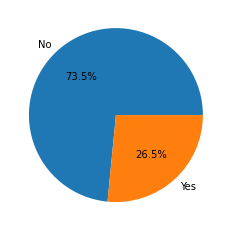

In [10]:
#menampilkan presentase data target
plt.pie(data_eda.Churn.value_counts(), labels=data_eda.Churn.unique(), autopct='%1.1f%%');

Target dari data set adalah kolom churn. Dataset ini merupakan data imbalance karena data memiliki ratio target yang tidak sama dengan ratio hampir 1:3.

Perusahaan ini hanya memiliki sekitar 735,% pelanggan yang benar-benar setia. Sedangkan 26,5 sisanya merupakan pelanggan yang churn. Angka 23,5 persen tidak bisa menjadi ukuran kondisi perusahaan, karena setip industri dari perusahaan memiliki standarnya masing-masing. Namun tentuntu saja dengan memperkecil persentase pelanggan yang churn merupakan suatu progress yang bak. Dengan memprediksi lebih cepat apakah seorang pelanggan memiliki kemungkinan churn, harapannya dapat mengurangi persentase pelanggan yang churn

## Sebaran data numerik feature

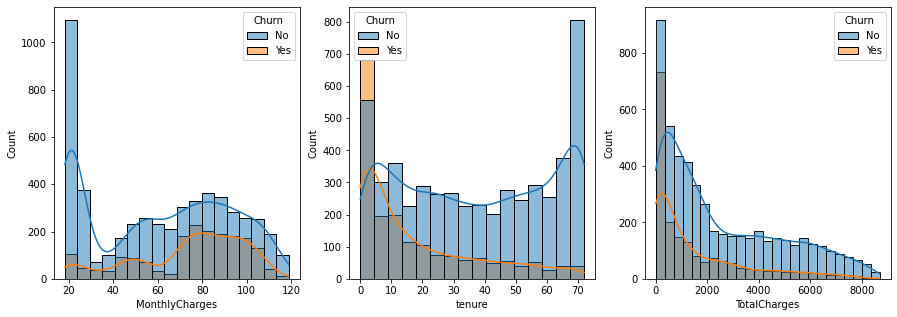

In [11]:
# menampilkan sebaran data numerik
wahyu_lib.histplot_1d(data=data_eda, list=['MonthlyCharges', 'tenure', 'TotalCharges'], hue='Churn')

Sebaran data konsumen yang `churn` dan tidak `churn` pada fitur `total charge` sangat identik. Sedangkan  pada fitur  monthly charges, konsumen yang tidak `Churn` pling banyak berada pada konsumen yang charges bulanannya bernilai kecil, namun pada nilai bulanan menengah dan besar, ratio konsumen untuk churn sama saja. Tenure merupakan fitur yang paling jelas perbedaan sebaran data antara konsumen yang churn maupun yang tidak churn. Semakin lama nilai tenure, semakin kecil ratio konsumen yang churn dibandingkan dengan konsumen yang tidak churn, begitu juga sebaliknya.

## Korelasi Fitur Numerik

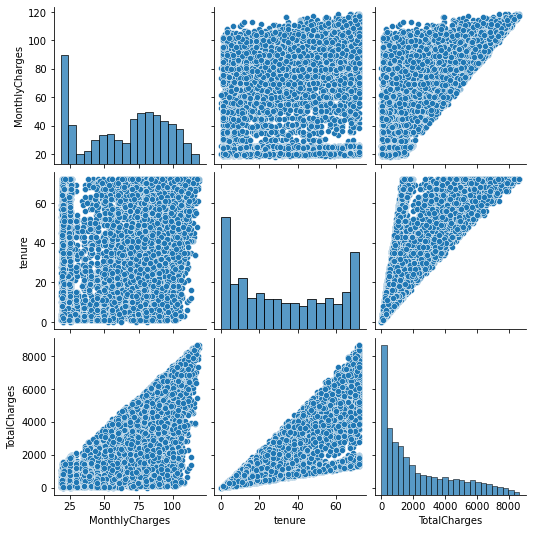

In [12]:
#menampilkan hubungan data dalam bentuk swarnplot
sns.pairplot(data=data_eda, vars=['MonthlyCharges', 'tenure', 'TotalCharges'])

In [13]:
#menampilkan korelaasi antar fitur numerik
data_eda[['MonthlyCharges', 'tenure', 'TotalCharges']].corr()

,MonthlyCharges,tenure,TotalCharges
MonthlyCharges,1.000000,0.247900,0.651174
tenure,0.247900,1.000000,0.826178
TotalCharges,0.651174,0.826178,1.000000


Jika kita melihat pada pada grafik diatas sangat jelas bahwa terdapat hubungan yang sangat erat antara `tenure` dan `total charge`. Semakin lama ``tenure``yang didapatkan seorang konsumen semakin besar juga `total charge` yang didapatkan oleh konsumen. Selain itu, `monthly charges` juga memiliki hubungan yang kuat dengan dengan `total charge`s. Yang **menarik** dari plot diatas adalah `total charge`s memiliki nilai korelasi yang **lebih kuat** dengan `tenure` dibandingkan dengan `monthly charges`. Padahal jika kita menggunakan logikan sederhana seharusnya `monthly charges` memiliki hubungan yang lebih kuat dengan `total charges` karena pada umumnya `total charges` merupakan kumpulan dari `monthly charges`. Saya berkesimpulan bahwa mungkin saja ada **charge** lain selain `monthly charges` sehingga korelasi kedua fitur tidak sekuat yang saya kira.

## Fitur Kategorik

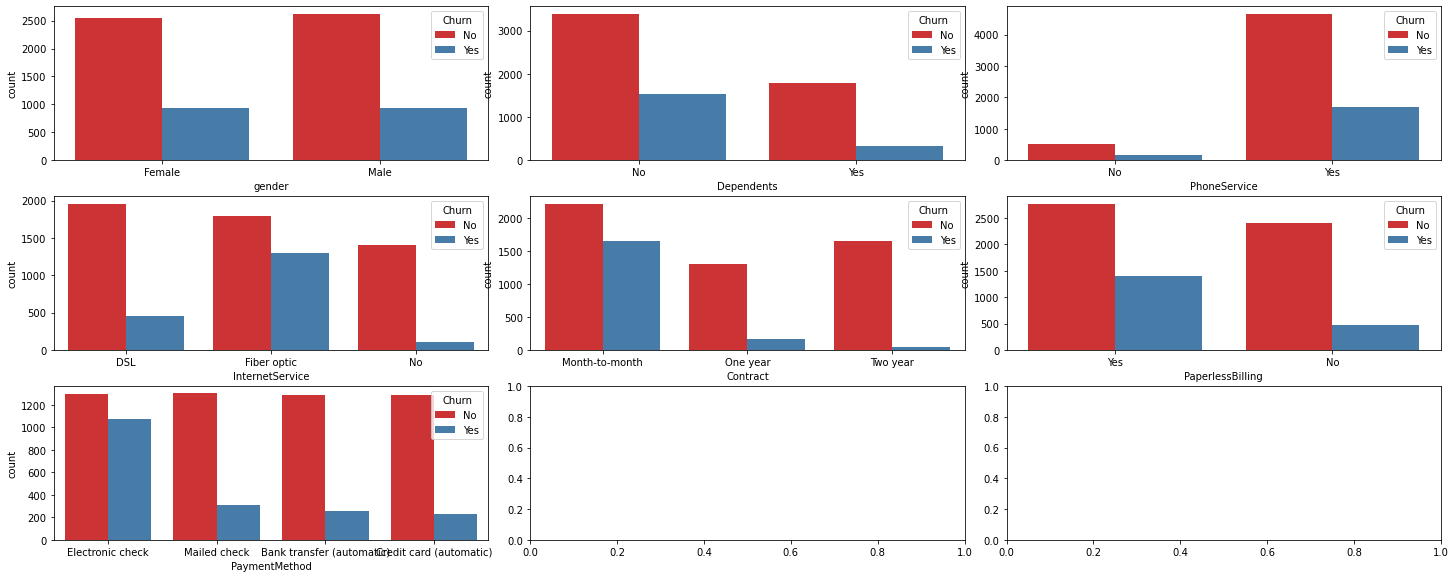

In [14]:
#menampilkan jumlah data pada setiap kategori fitur berdasarkan target
wahyu_lib.show_count(
    data=data_eda, 
    list=['gender', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling','PaymentMethod'],
    hue='Churn',
    figsize=[20,8]
    )

Berdasarkan plot diatas terdapat beberapa perbedaan ratio antara konsumen yang churn dengan konsumen yang tidak churn pada beberapa fitur, diantaranya yaitu `internet service` `payment method`, `internet service`, `contract`. Pada `internet service` ratio konsumen yang churn pada konsumen yang menggunakan fiber optic lebih besar jika dibandingkan dengan yang lainnya.

Insight lain yang didapatkan adalah semakin lama kontrak yang dibuat bersama konsumen semakin kecil ratio konsumen yang churn. Hal ini sangat masuk akal karena jika kita berhasil melakukan kontrak jangka panjang, maka akan sangat kecil kemungkinan kita perlu melakukan pembaharuan kontrak. Sehingga semakin kecil kemungkinan `churn`. Pada `payment method`, electronic check juga meningkatkan ratio konsumen menjadi churn. Ada baiknya untuk perusahaan mendorong konsumennya untuk melakukan pembayaran melalui `mailed heck`, `bank transfer(automatic), kredit card(automatic)`. Metode pembayaran yang memiliki fitur otomatis menjadi membuat pelanggan merasa lebih mudah  dalam melakukan pembayaran sehingga pelanggan lebih nyaman selama menjadi konsumen.

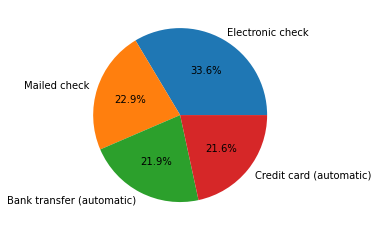

In [18]:
#menampilkan presentase jenis pembayaran yang digunakan pelanggan
plt.pie(data_eda.PaymentMethod.value_counts(), labels=data_eda.PaymentMethod.unique(), autopct='%1.1f%%');

Selain dengan mengarahkan konsumen melakukan pembayaran melalaui metode pembayaran yang memiliki fitur automatic payment. Tim marketing juga perlu mencari konsumen baru yang sudah memiliki moda pembayaran dengan fitur automatic payment. Hal itu perlu dilakukan karena seperrti yang kita lihat pada **grafik diatas** bahwa moda pembayaran electronic check masih menjadi moda pembayaran paling banyak dilakukan oleh pelanggan. Dengan mencari konsumen yang sudah memiliki moda pembayaran dengan fitur automatic payments, harapannya semakin sedikit pelanggan yang churn.

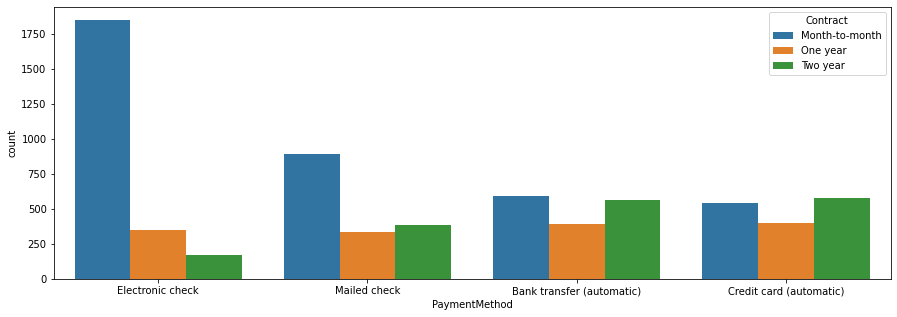

In [19]:
fig, ax=plt.subplots(figsize=[15,5])
sns.countplot(data=data_eda, x='PaymentMethod', hue='Contract', ax=ax)

Grafik diatas menunjukkan bahwa pelanggan yang melakukan pembayaran dengan moda pembayaran tanpa fitur automatic payments cenderung memilih kontract month to month. Kontrak month to month akan meningkatkan kemungkinan pelanggan churn. Marketing bisa menggunakan insgiht ini untuk membuat promosi. Saya sarankan agar promosi ditekankan kepada pengguna yang melakukan pembayaran otomatis dan kontak jangka panjang. Mendapatkan konsumen yang berkualitas(konsumen yang tidak churn) akan membantu perusahaan untuk mendapatkan keuntungan yang lebih besar karena mendapatkan konsumen baru lebih mahal biayanya dibandingkan dengan mempertahankan pelanggan lama.

# Data preprocessing

## Get Inference

Proses ini adalah proses untuk menyisihkan beberapa data sebagai data inference.

In [20]:
#memisahkan menjadi 2 data, yaitu data infrence dan data train
data_inf = data.sample(20, random_state=0)
data_train= data.drop(data_inf.index)

Sebelum melakukan data preprocessing lainnya, Saya memutuskan untuk melakukan drop pada fitur `CustomerID` karena tidak ada kaitannya antara ID dan `Churn`. Hal itu dikarenakan setiap baris akan memiliki nilai unique masing-masing.

In [21]:
#menghilangkan kolom customer id
list_drop=['customerID']
data_train.drop(columns=list_drop, inplace=True)

Selain itu, ada yang menarik pada fitur `multiple lines`. Ada 1 unique value yang menurut saya menarik yaitu, `No phone service`, serta beberapa fitur lainnya yang memiliki nilai `No internet service`

In [22]:
# menampilkan kolom dan unique valuenya
for i in data_train.columns:
    if data_train[i].dtypes=="object":
        print(f'{i}: {data_train[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Saya berasumsi bahwa `no multiple service` adalah kategori yang menejelas kan bahwa `multiple lines` bernilai `no` karena phone service bernilai `no`. Saya akan mengganti nilai `No phone service` pada fitur multiple lines menjadi `no` karena `no phone service` menjelaskan data yang sebenarnya sudah ada pada fitur multiple lines. Pola ini juga bisa kita temukan pada fitur yang yang berhubungan dengan internet service(`OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies` ), Saya akan melakukan hal yang sama pada fitur tersebut.

In [23]:
#melakukan replace data
data_train.MultipleLines.replace('No phone service', 'No', inplace=True)
data_train.OnlineSecurity.replace('No internet service', 'No', inplace=True)
data_train.OnlineBackup.replace('No internet service', 'No', inplace=True)
data_train.DeviceProtection.replace('No internet service', 'No', inplace=True)
data_train.TechSupport.replace('No internet service', 'No', inplace=True)
data_train.StreamingTV.replace('No internet service', 'No', inplace=True)
data_train.StreamingMovies.replace('No internet service', 'No', inplace=True)

In [24]:
#melakukan replace data
data_inf.MultipleLines.replace('No phone service', 'No', inplace=True)
data_inf.OnlineSecurity.replace('No internet service', 'No', inplace=True)
data_inf.OnlineBackup.replace('No internet service', 'No', inplace=True)
data_inf.DeviceProtection.replace('No internet service', 'No', inplace=True)
data_inf.TechSupport.replace('No internet service', 'No', inplace=True)
data_inf.StreamingTV.replace('No internet service', 'No', inplace=True)
data_inf.StreamingMovies.replace('No internet service', 'No', inplace=True)

## Data Split

Data split merupakan proses membagi data train menjadi 3 potongan data, yaitu data train, data validation dan data test. Data train dan data validation adalah data yang digunakan untuk melakukan training pada model, sedangkan data test adalah data yang nantinya akan digunakan untuk mengevaluasi model.

In [25]:
#split data
X_train, y_train, X_val, y_val, X_test, y_test=wahyu_lib.split_data(data_train, 'Churn', 0.15, 0.15)

## Handling Outliers

Hanya ada 2 data numerik, yaitu tenure dan monthly charges. Dalam melakukan handling outliers saya sudah menyiapkan fungsi yang ada di `wahyu_lib`. Fungsi ini akan melakukan capping kepada data yang ada di dalam parameter `list`. Setiap kolom akan di lakukan capping sesuai dengan distribusi data pada setiap kolomnya.

In [26]:
# winsorizing data
X_train=wahyu_lib.handling_outliers(data=X_train, list=['MonthlyCharges', 'tenure'])

kolom gausian    :  MonthlyCharges, tenure
kolom Skew       :  


## Handling Missing Value

**Cek null value**

In [27]:
# cek jumlah baris data yang null
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

>Tidak ditemukan adanya null value.

Selain melakukan check pada nullvalue, kita juga perlu melakukan check terhadap unique value pada setiap kolom kategorik.

In [28]:
# menampilkan kolom dan unique valuenya
for i in X_train.columns:
    if X_train[i].dtypes=="object":
        print(f'{i}: {X_train[i].unique()}')

gender: ['Male' 'Female']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['No' 'DSL' 'Fiber optic']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
PaymentMethod: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Selain data categorik, kita juga perlu melakukan chack pada data numeik dengan melihat describe pada data numeriknya.

In [29]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5073.000000,5073.000000,5073.000000,5073.000000
mean,0.164203,32.019515,64.685107,2250.548433
std,0.370496,24.483413,30.205075,2256.750075
min,0.000000,0.000000,18.700000,0.000000
25%,0.000000,8.000000,35.050000,377.850000
50%,0.000000,28.000000,70.550000,1359.000000
75%,0.000000,55.000000,90.000000,3720.350000
max,1.000000,72.000000,118.650000,8684.800000


Jika dilihat dari data yang ada diatas tidak ada hal yang perlu di curigai missing value pada data numerik karena tidk ada datang terlalu kecil ataupun terlalu besar. Hanya saja karena data seior netizen adalah berisi angka, sehingga senior netizen masuk kedalam data diatas.

## Scaling & Encoding 

Scaling dilakukan pada data numerik sedangkan encoding dilakukan pada data kategorik. Agar memudahkan kita dalam melakukan scaling dan encosing, kita perlu membuat list fitur numerik dan fitur kategotik.

In [30]:
# memisahkan data numerik dan kategorik
num_list, cat_list=wahyu_lib.pisah_num_cat(X_train)

feature numerik   :  SeniorCitizen, tenure, MonthlyCharges, TotalCharges
feature kategorik :  gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod


Seperti yang disampaikan sebelumnya. fitur SeniorCitizen merupakan data kategorik namun seolah telah di encoding, maka fitur tersebut tidak akan dilakukan scaling maupun encoding.

In [31]:
# menghapus nilai senior netizen dati list numerik
num_list.remove('SeniorCitizen')
pass_list=['SeniorCitizen']

Proses encoding dan scaling dilakukan pada data train, validation dan data test. Walaupun dilakukan pada ketiga Fitur, namun yang dilakukan fit hanyalah pada data train.

In [32]:
# membuat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_list),
        ("cat", OrdinalEncoder(), cat_list),
        ("pass", 'passthrough', pass_list),
    ]
)
# melakukan encoding dan scaling
X_train_final=preprocessor.fit_transform(X_train)
X_test_final=preprocessor.transform(X_test)
X_val_final=preprocessor.transform(X_val)

# membuat data frame data yang telah di preprocessing
df_X_train_final=pd.DataFrame(data=X_train_final, columns=num_list+cat_list+pass_list)
df_X_val_final=pd.DataFrame(data=X_val_final, columns=num_list+cat_list+pass_list)
df_X_test_final=pd.DataFrame(data=X_test_final, columns=num_list+cat_list+pass_list)

Selain melakukan encoding pada data Fitur, Data Target juga perlu dilakukan label encoding.

In [33]:
#encoding data target
target_encoder=LabelEncoder()
y_train_final=target_encoder.fit_transform(y_train)
y_val_final=target_encoder.transform(y_val)
y_test_final=target_encoder.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Feature Selection

Fiture Selection yang digunakan adalah dengan menggunakan attribut feature_importance pada `random forest`.

In [34]:
#melakukan training dengan random forest
X_train_final=preprocessor.fit_transform(X_train)
ranfor=RandomForestClassifier().fit(df_X_train_final, y_train_final)

In [35]:
#menampilkan nilai feature importance
fitur_importance=pd.Series(data=ranfor.feature_importances_, index=num_list+cat_list+pass_list) 
fitur_importance.sort_values(ascending=False)

TotalCharges        0.194564
MonthlyCharges      0.192020
tenure              0.158403
Contract            0.083400
PaymentMethod       0.052558
InternetService     0.047866
PaperlessBilling    0.027846
gender              0.027158
Partner             0.023401
TechSupport         0.023280
OnlineSecurity      0.022885
SeniorCitizen       0.021748
OnlineBackup        0.021410
Dependents          0.021221
MultipleLines       0.020556
DeviceProtection    0.019473
StreamingMovies     0.017874
StreamingTV         0.017432
PhoneService        0.006906
dtype: float64

Feature yang saya pilih adalah fitur yang memiliki nilai diatas 0,3. Yaitu `Monthly Charges`, `Total Charges`, `Tenure`, `Contract`, `PaymentsMethond`, dan `Internet Service`. Namun karena Total Charge dan tenur memiliki korelasi yang sangat kuat maka saya hanya memilih salah satu diantar keduanya. Saya memutuskan untuk memilih `total charge` dengan pertimbangan `total charge` memiliki nilai **fitur importance** yang lebih besar

In [36]:
# fitur yangdipilih
feature_selected=['MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod','InternetService', 'PaperlessBilling', 'TechSupport']

In [37]:
# update preprocessor encoding dan scaling ulang dengan feature yang terpilih
preprocessor_final = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ['MonthlyCharges', 'TotalCharges']),
        ("cat", OrdinalEncoder(), ['Contract', 'PaymentMethod','InternetService', 'PaperlessBilling', 'TechSupport'])
    ]
)

X_train_final=preprocessor_final.fit_transform(X_train)
X_val_final=preprocessor_final.transform(X_val)
X_test_final=preprocessor_final.transform(X_test)

## Input Pipline

Input pipeline digunakan agar membantu kinerja komputasi agar lebih efisien.

In [38]:
#input pipeline data train
X_train_batch=tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final))
X_train_batch=X_train_batch.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [39]:
#input pipeline data validation
X_val_batch=tf.data.Dataset.from_tensor_slices((X_val_final, y_val_final))
X_val_batch=X_val_batch.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [40]:
#input pipeline data test
X_test_batch=tf.data.Dataset.from_tensor_slices((X_test_final, y_test_final))
X_test_batch=X_test_batch.batch(64).cache().prefetch(tf.data.AUTOTUNE)

# Model Definition

Model yang digunakan adalah model ANN sequential dan ANN Functional

## ANN Sequential

In [41]:
baccuracy=tf.keras.metrics.BinaryAccuracy(threshold=0.55)
model_seq=tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7,input_shape=(len(feature_selected),),activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_seq.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=[baccuracy])


## Model Functional

In [42]:
input_tensor=tf.keras.layers.Input(shape=(len(feature_selected),))
A1=tf.keras.layers.BatchNormalization()(input_tensor)
A2=tf.keras.layers.Dense(128)(A1)
A3=tf.keras.layers.Activation('relu')(A2)
B1=tf.keras.layers.BatchNormalization()(input_tensor)
B2=tf.keras.layers.Dense(64)(B1)
B3=tf.keras.layers.Activation('elu')(B2)
C=tf.keras.layers.Concatenate(axis=1)([A3, B3, input_tensor])
output_tensor=tf.keras.layers.Dense(1,activation="sigmoid")(C)
model_func=tf.keras.models.Model(inputs= input_tensor,
                      outputs=output_tensor)

model_func.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
             metrics=baccuracy)


# Model Training

## Training model Sequential

In [43]:
history=model_seq.fit(X_train_batch,
        epochs=100,
        validation_data=X_val_batch,
        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=10)],
        verbose=0
        )

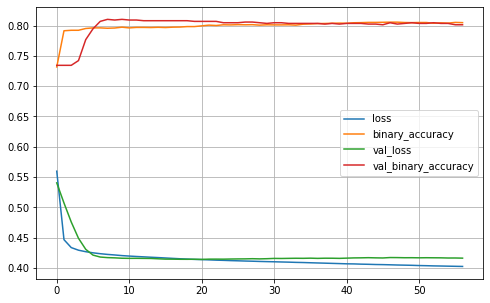

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Proses training tidak sampai pada akhir dari eppoch karena pada model fit telah kita inisialisasi call back berupa early stopping yang mencegah terjadinya model vannishs berlama-lama. Model akan berhenti saat model mengalami penurunan sebanyak 10 kali atau saat model tidak dapat melampaui nilai tertinggi terakhir sebelum model mengalami penurunnan. Yang diawasi oleh callback dalam hal ini adalah accuracy.

Pada ujung grafik bisa kita garis berwarna orange dan hijau mulai mengalami vanish dan berhenti sebelum vanishnya berlarut-larut. Walaupun seperti itu model merupakan model goodfit jika dilihat dari grafik namun masih perlu dilakukan evaluasi lebih lanjut dengan menggunakan data testing.

In [45]:
model_seq.save("churn")

INFO:tensorflow:Assets written to: churn/assets


In [46]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 7)                28        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 7)                 56        
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               1024      
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                        

Layer pada model terdiri dari 3 layer dense dan 3 layer batch normalization. Batch normalization bertujuan untuk melakukan normalisasi terlebih dahulu sebelum input masuk kedalam layer selanjutnya. Dengan cara itu kita bisa menghindari terjadinya exploding gradient problem. Untuk lebih jelasnya, silahkan lihat grafik dibawah untuk melihat isi dari sequential model.

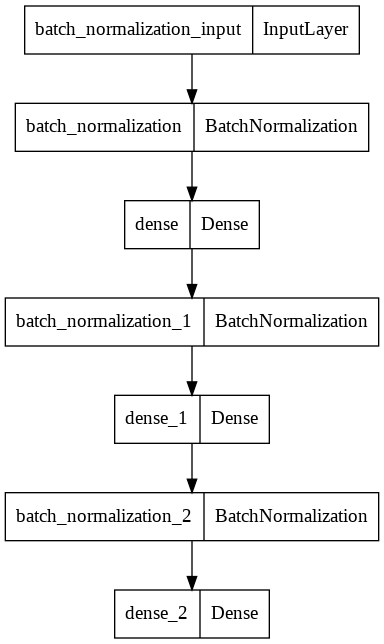

In [47]:
tf.keras.utils.plot_model(model_seq)

## Training Model Functional

In [48]:
history_func=model_func.fit(X_train_batch,
        epochs=100,
        validation_data=X_val_batch,
        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=10)],
        verbose=0
        )

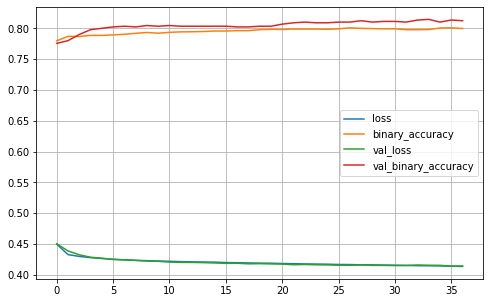

In [49]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Training yang dilakukan pada model funtional lebih sebentar karena jumlah iterasi yang lebih sedikit. Model berhenti pada epoch ke 37 karena sama halnya dengan model squential, model functional juga diberika inisiasi callback berupa early stopping. Grafik diatas menunjukkan bahwa model tidak mengalami vanishing dan tidak mengalami exploding.

In [50]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 7)           28          ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 7)           28          ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                              

Model Functional terdiri dari beberapa layer mulai dari input layer. kemudia dari inpute layer, model memasuki 2 model batch normalization agar model tidak mengalami exploding gradient problem. Masing-masing dari batch normalization tersebut kemudian masuk ke layar dense. setiap layer dense memiliki ativation funtionnya masing masing. Kemudian di hasil dari kedua layer tersebut di gabungkan bersama dengan input yang awal untuk masuk layer terakhir sebelum layer output. Untuk lebih jelasnya silahkah lihat grafik dibawah.

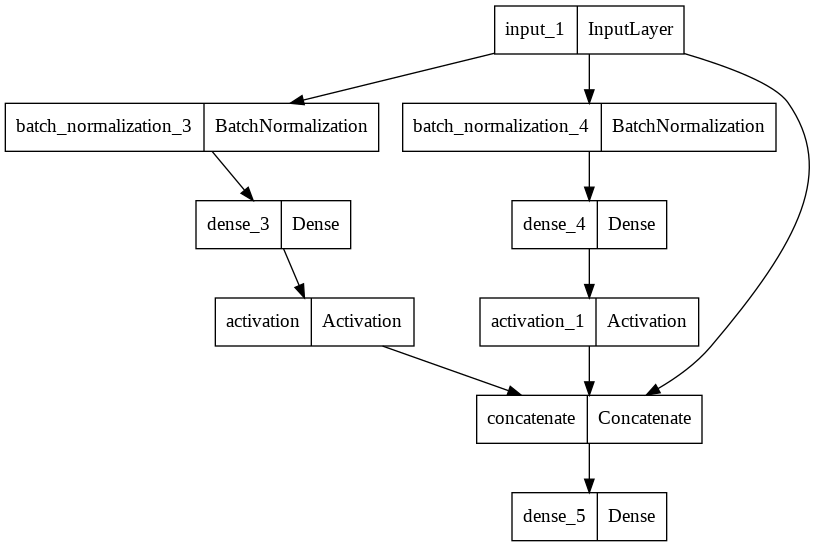

In [51]:
tf.keras.utils.plot_model(model_func)

# Model Evaluation

## Model Sequential

In [52]:
y_train_pred=model_seq.predict(X_train_batch)
y_test_pred=model_seq.predict(X_test_batch)
y_train_pred=np.where(y_train_pred>0.55,1,0)
y_test_pred=np.where(y_test_pred>0.55,1,0)

In [53]:
print(classification_report(y_train_final, y_train_pred))
print(classification_report(y_test_final, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3726
           1       0.70      0.44      0.54      1347

    accuracy                           0.80      5073
   macro avg       0.76      0.68      0.71      5073
weighted avg       0.79      0.80      0.78      5073

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       773
           1       0.71      0.41      0.52       281

    accuracy                           0.80      1054
   macro avg       0.76      0.67      0.70      1054
weighted avg       0.79      0.80      0.78      1054



Model sequential merupakan model yang good fit karena memiliki accuracy score yang tidentik antara data train dan data test. Nmun jika kita melihat pada recall nilainya sangatlah kecil dan dapat dikategorikan sebagai model yang underfit.

## Model Functional

In [54]:
y_train_pred=model_func.predict(X_train_batch)
y_test_pred=model_func.predict(X_test_batch)
y_train_pred=np.where(y_train_pred>0.55,1,0)
y_test_pred=np.where(y_test_pred>0.55,1,0)

In [55]:
print(classification_report(y_train_final, y_train_pred))
print(classification_report(y_test_final, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3726
           1       0.66      0.50      0.57      1347

    accuracy                           0.80      5073
   macro avg       0.75      0.70      0.72      5073
weighted avg       0.79      0.80      0.79      5073

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       773
           1       0.67      0.46      0.55       281

    accuracy                           0.80      1054
   macro avg       0.75      0.69      0.71      1054
weighted avg       0.78      0.80      0.78      1054



Model functional memiliki kinerja yang tidak jauh berbeda dengan model sequantia. Namun jika dilihat dari nilai recall, kedua model merupakan model yang underfit.

Improvement perlu dilakukan pada model ataupun data set dengan menambahkan dropout atau menggunakan smotenc untuk melakukan balancing data. Atau bisa juga dilakukan dengan ujicoba menggunakan machine learning untuk mendapatkan performa yang lebih baik.

# Model Improvement

## Over Sampling

Karena data merupakan data imbalance. Maka agar data menjadi data yang balance perlu dilakukan balancing data.

In [56]:
#resample dengan SMOTE NC
X_train_final_smo, y_train_final_smo=SMOTENC(categorical_features=[2,3,4,5,6], random_state=0, k_neighbors=8).fit_resample(X_train_final, y_train_final)

In [57]:
#input pipeline data train
X_train_batch_smo=tf.data.Dataset.from_tensor_slices((X_train_final_smo, y_train_final_smo))
X_train_batch_smo=X_train_batch_smo.batch(64).cache().prefetch(tf.data.AUTOTUNE)

In [58]:
#membuat model sequntial
model_seq2=tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7,input_shape=(len(feature_selected),),activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_seq2.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=[baccuracy])

In [59]:
#training model
history=model_seq2.fit(X_train_batch_smo,
        epochs=100,
        validation_data=X_val_batch,
        # callbacks = [tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=10)],
        verbose=0
        )

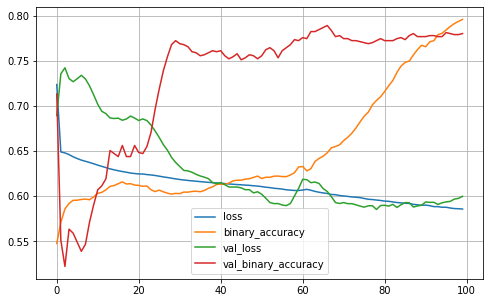

In [60]:
# show plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Menggunakan over sampling tidak berhasil memperbaiki model. Yang terjadi justru terjadi explodng gradient problem. Perlu dilakukan percobaa lebih banyak seperti merubah activation function aatau menambahkan drop out dan lain sebagainya agar model dapat bekerja dengan lebih baik

Berdasarkan yang telah dilakukan saya memutuskan menggunakan model sequence untuk digunakan pada sistem

In [61]:
model_seq.trainable=False
model_seq.save('Churn')

INFO:tensorflow:Assets written to: Churn/assets


# Model Inference

Hal yang pertama dilakukan adalah menyiapkan data agar siap diterima oleh model. Dalam meyiapkan data hanya perlu melakukan transform dengan menggunakan `preprocessor final`. Data yang telah disiapkan bisa langsung di prediksi oleh model yang telah dibuat.

In [62]:
#meyiapkan data
data_inf_final=preprocessor_final.transform(data_inf)

In [63]:
# melakukan prediksi
pred_seq=model_seq.predict(data_inf_final)
pred_func=model_func.predict(data_inf_final)
pred_seq=np.where(pred_seq>0.55,'Yes','No')
pred_func=np.where(pred_func>0.55,'Yes','No')

In [64]:
# memasukkan hasil prediksi ke data inference
data_inf['Predict Sequential']=pred_seq
data_inf['Predict Functional']=pred_func
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Predict Sequential,Predict Functional
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,Yes,No,One year,No,Electronic check,58.20,1045.25,No,No,No
4627,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50,No,No,No
3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No,No,No
2828,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No,...,No,No,Two year,No,Mailed check,20.45,20.45,No,No,No
3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40,No,No,No
4446,6161-UUUTA,Male,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,79.90,260.90,Yes,Yes,Yes
2234,4500-HKANN,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,No,Two year,No,Mailed check,59.70,1414.20,No,No,No
5454,2506-TNFCO,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.55,69.55,Yes,Yes,Yes
1278,4730-AWNAU,Male,0,Yes,Yes,36,No,No,DSL,Yes,...,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No,No,No
578,6522-YRBXD,Male,1,Yes,No,35,Yes,Yes,Fiber optic,Yes,...,No,Yes,Month-to-month,Yes,Electronic check,94.55,3365.40,No,No,No


Model Sequential berhasil melakukan prediksi dengan tepat sebanyak 18 dari 20 data merupakan false positive dab 1 false negative. Model Functional juga memprediksi dengan benar 18 data dan keduanya adalah false positive.

# Kesimpulan

Model yang dibuat pada kasus ini adalah model yang dapat melakukan prediksi terhadap data apakah pelanggan akan churn atau tidak. pelanggan churn memiliki beberapa karakteristik, yaitu sebagian besar terjadi pada pelanggan dengan tenure sebentar. Selain itu metode pembayaran juga cukup berpengaruh pada konsumen. Pelanggan dengan metode pembayaran electronic check adalah pelanggan yang paling banyak churn. Sehingga pelanggan bisa mengalihkan pelanggan untuk menggunakan metode pembayaran yang memiliki fitur automatic. Karena pada metode pembayaran tersebut pelanggan sedikit yang churn. Hal itu bisa saja disebabkan karena kemudahan pembayaran menjadi pemicu pelanggan lebih loyal. Selain mengalihkan metode pembayaran, marketing juga bisa mencari pelanggan baru yang sudah terbiasa menggunakan metode pembayaran yang memiliki fitur otomatic pyments. Iklan iklan yang ditayangkan juga bisa diarahkan kepada calon konsumen dengan karakter yang memiliki model pembayaran otomatis. Insight lain yang didapatkan adalah semakin lama kontrak yang dibuat bersama konsumen semakin kecil ratio konsumen yang churn. Perusahaan dapat memberika promo lebih besar kepada konsumen yang memiliki kontrak lebih untuk kontak yang berjangka panjang agar konsumen lebih tergiur kepada kontrak jangka panjang.

2 Model telah berhasil dibuat, yaitu model sequential dan model `functional`. kedua model goodfit jika ditinjau pada hasil accuracynya dan under fit jika dilihat dari skor recall. Performa dari kedua model juga tidak lah jauh berbeda namun model `Functional` sedikit lebih baik jika ditinjau dari skor accuracynya karena memiliki nilai accuracy yang identik. Fitur yang dipilih untu melakukan training pada model adalah `MonthlyCharges`, `TotalCharges`, `Contract`, `PaymentMethod`,`InternetService`, `PaperlessBilling`, `TechSupport`